# Pandas 入門

Pandas はデータ操作によく用いられるパッケージであり、CSV などの一般的なデータ形式で保存されたデータの読み込みや、条件を指定しての一部データの抽出など、機械学習手法で取り扱うデータを整理するのに便利です。

今回は Pandas の以下の代表的な機能の使い方を説明します。  

- CSV ファイルの読み書き
- 統計量の算出
- 並べ替え
- データの選択
- 条件指定による選択
- 欠損値の除去 / 補間
- ndarray とデータフレームを相互に変換
- グラフの描画

まず Pandas パッケージを読み込みましょう。
`pandas` は `pd` という別名を与えて用いるのが一般的です。

In [2]:
import pandas as pd

## CSV ファイルの読み書き

データセットは Google Colaboratory で用意されているサンプルデータを使用します。
Google Colaboratory 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)をダウンロードして、使用してください。



Pandas では CSV ファイルを読み込むための `pd.read_csv()` という関数が用意されています。
こちらを使って CSV ファイルを読み込みます。

In [3]:
# データセットの読み込み
df = pd.read_csv('sample_data/california_housing_train.csv')

`df` という変数名は、**データフレーム (data frame)** という Pandas で中心的に用いられる**データ構造 (data structure)** を表すクラスの名前の頭文字に由来しています。
`pd.read_csv()` 関数は、CSV ファイルの内容を `DataFrame` オブジェクトに読み込みます。

In [4]:
# 型の確認
type(df)

pandas.core.frame.DataFrame

## DataFrame の表示

`df` に読み込まれたデータの中身の確認してみましょう。
Jupyter Notebook 上では、大きな DataFrame を表示しようとすると自動的に一部が省略されることがあります。

In [5]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

## 先頭の数件だけを表示

データを数件のみ確認したい場合は、データフレームがもつ `df.head()` メソッドを使用します。
`df.head()` はデフォルトで先頭から 5 件のデータを表示しますが、`df.head(3)` のように引数に表示したいデータ件数を指定すると、指定された件数だけを表示することもできます。
それでは、`df.head()` を実行してみましょう。

In [6]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [7]:
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0

特定の列を抽出したい場合は、`df` に対し、Python の辞書オブジェクトに行うように `[]` を使って取り出したい列の名前を指定します。

In [8]:
df['longitude'].head(3)

0   -114.31
1   -114.47
2   -114.56
Name: longitude, dtype: float64

## CSV ファイルの保存

Pandas ではデータフレームオブジェクトの内容を CSV ファイルとして保存するための `df.to_csv()` というメソッドが用意されています。

In [9]:
df.to_csv('sample.csv')

In [10]:
!ls sample.csv

sample.csv


## データフレームの形

データフレームオブジェクトの行数と列数を確認するには、`df.shape()` メソッドを用います。

In [11]:
# 形の確認
df.shape

(17000, 9)

## 統計量の算出

データフレームには、中のデータに対し統計量を計算するためのメソッドも用意されています。
代表的なものを紹介します。

In [12]:
# 平均
df.mean()

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

In [13]:
# 分散
df.var()

longitude             4.020692e+00
latitude              4.568221e+00
housing_median_age    1.584310e+02
total_rooms           4.752169e+06
total_bedrooms        1.776618e+05
population            1.317566e+06
households            1.478563e+05
median_income         3.641061e+00
median_house_value    1.345223e+10
dtype: float64

In [14]:
# 各列の None, NaN, NaT のいずれでもない値の数
df.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

ここで、データの特徴をおおまかに調べるために便利な `df.describe()` メソッドを実行してみましょう。

In [15]:
# データの概要
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

また、もうひとつ便利なメソッドに相関係数を算出する `df.corr()` があります。
入力変数間や入出力間の相関係数を確認することができます。

In [16]:
# 相関係数の算出
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_median_age       -0.320434   -0.295890   -0.302754      -0.115932   
total_rooms               0.928403    0.860170    0.919018       0.195383   
total_bedrooms            1.000000    0.881169    0.980920      -0.013495   
population                0.881169    1.000000    0.909247      -0.000638   
households                0.980920    0.909247    1.000000       0.007644   
median_income            -0.013495   -0.000638    0.007644       1.000000   
median_house_value        0.045783   -0.027850    0.061031       0.691871   

                    median_house_value  
longitude                    -0.044982  
latitude                     -0.144917  
housing_median_age            0.106758  
total_rooms                   0.130991  
total_bedrooms                0.045783  
population                   -0.027850  
households                    0.061031  
median_income                 0.691871  
median_house_value            1.000000

## 並べ替え

データフレームのある列を抽出し、`df.sort_values()` メソッドを呼び出すことで値の**並べ替え (sort)** を行うことができます。
なお、このメソッドは並べ替えが終わったあとの値でもとのデータフレーム内の値を置き換えることまでは行わず、結果を返します。
そこで、別の変数で結果を受け取り、始めの 5 行を表示することで並べ替えが行われたことを確認してみましょう。

`df.sort_values()` は、デフォルトでは**昇順 (ascending)** に並べ替えを行います。昇順とは、だんだん値が大きくなっていくように並べ替えるときの並べ方のことで、逆にだんだん値が小さくなっていくように並べ替えるときは、**降順 (descending)** に並べると言います。

`df.sort_values()` は並べ替えを行いたい列の名前を `by` という引数で受け取ります。また、デフォルトでは昇順に並べ替えを行います。

In [17]:
# total_rooms 列の値を昇順に並べ替え
df_as = df.sort_values(by='total_rooms')

In [18]:
df_as.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2990     -117.79     35.21                 4.0          2.0             2.0   
16309    -122.50     37.79                52.0          8.0             1.0   
8188     -118.44     34.28                46.0         11.0            11.0   
15369    -122.29     37.81                46.0         12.0             4.0   
15656    -122.37     37.60                26.0         15.0             3.0   

       population  households  median_income  median_house_value  
2990          6.0         2.0         2.3750            137500.0  
16309        13.0         1.0        15.0001            500001.0  
8188         24.0        13.0         2.8750            162500.0  
15369        18.0         7.0         0.4999             67500.0  
15656        11.0         3.0         5.0480            350000.0

降順に並べ替える場合は、`ascending=False` という引数の指定を行います。

In [19]:
# total_rooms の列の値を降順に並べ替え
df_de = df.sort_values(by='total_rooms', ascending=False)

In [20]:
df_de.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2871     -117.74     33.89                 4.0      37937.0          5471.0   
12772    -121.79     36.64                11.0      32627.0          6445.0   
2969     -117.78     34.03                 8.0      32054.0          5290.0   
8881     -118.78     34.16                 9.0      30405.0          4093.0   
1116     -117.12     33.52                 4.0      30401.0          4957.0   

       population  households  median_income  median_house_value  
2871      16122.0      5189.0         7.4947            366300.0  
12772     28566.0      6082.0         2.3087            118800.0  
2969      15507.0      5050.0         6.0191            253900.0  
8881      12873.0      3931.0         8.0137            399200.0  
1116      13251.0      4339.0         4.5841            212300.0

## データの選択

着目したい要素や、行、列を選択する方法として、ここでは、行名や列名を用いてデータの部分選択を行う `df.loc[]` を紹介します。

In [21]:
# データの確認
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0

In [22]:
# df.loc[行名, 列名]
# 0 行目 longitude 列の選択
df.loc[0, "longitude"]

-114.31

In [24]:
# 1 行目 latitude 列の選択
df.loc[1, "latitude"]

34.4

`loc` は NumPy の ndarray の中の値を部分的に選択するのと同様のスライス表記を用いることができます。

In [33]:
# すべての行を選択
t = df.loc[:, "housing_median_age"]

In [34]:
# 先頭3件の表示
t.head(3)

0    15.0
1    19.0
2    17.0
Name: housing_median_age, dtype: float64

In [25]:
# 型の確認
type(t)

pandas.core.series.Series

1 行だけ、もしくは 1 列だけ抽出した場合は、**シリーズ (series)** オブジェクトが返されます。

## 条件指定による要素の選択

次に値に対する条件を指定してデータの選択を行う方法を紹介します。

簡単のため、まず `median_house_value` 列を選択し、返ってきたシリーズオブジェクトに対して、比較演算子を使って**各要素に対する条件**を指定し、条件を満たすかどうかを全要素に対して調べた結果を取得してみましょう。

In [31]:
# median_house_value 列を選択し、全要素に対し 70000 より大きいかどうかを計算
mask = df['median_house_value'] > 70000

In [32]:
mask.head()

0    False
1     True
2     True
3     True
4    False
Name: median_house_value, dtype: bool

このように、比較演算子の片方の辺にデータフレームやシリーズをおくと、指定された条件を満たすかどうかを全ての要素に対して計算することができます。
結果は、各要素が条件を満たすか、満たさないかを表す `True`、`False` が各要素の位置に格納されたデータフレームやシリーズとなります。
これを**マスク (mask)** と呼ぶことがあります。

そして、データフレームやシリーズも NumPy の ndarray と同様に、マスクを使って要素を選択することができます。
上の `mask` を `df` に `[]` を使って与えることで、指定した条件を満たす要素だけを取り出すことができます。

In [33]:
# df[mask] の先頭 5 行を表示
df[mask].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
5    -114.58     33.63                29.0       1387.0           236.0   
6    -114.58     33.61                25.0       2907.0           680.0   

   population  households  median_income  median_house_value  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
5       671.0       239.0         3.3438             74000.0  
6      1841.0       633.0         2.6768             82400.0

### 複数の条件指定による要素の選択

複数の条件を組み合わせて要素を選択することも出来ます。
その場合は条件式を `()` でくくって用います。
**論理和 (or)** は `|`、**論理積 (and)** は `&` を用いて表します。

In [34]:
# 70000 より小さい または 80000 より大きい
mask2 = (df['median_house_value'] < 70000) | (df['median_house_value'] > 80000)

In [35]:
mask2.head()

0     True
1     True
2     True
3    False
4     True
Name: median_house_value, dtype: bool

In [36]:
df[mask2].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
4    -114.57     33.57                20.0       1454.0           326.0   
6    -114.58     33.61                25.0       2907.0           680.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
4       624.0       262.0         1.9250             65500.0  
6      1841.0       633.0         2.6768             82400.0

このように複雑な条件で要素を選択する際は `query` メソッドを使用すると簡潔に書くことができます。

In [57]:
# 70000 より小さい または 80000 より大きい
df.query("median_house_value < 70000 | 80000 < median_house_value")


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
4        -114.57     33.57                20.0       1454.0           326.0   
6        -114.58     33.61                25.0       2907.0           680.0   
...          ...       ...                 ...          ...             ...   
16993    -124.23     40.54                52.0       2694.0           453.0   
16995    -124.26     40.58                52.0       2217.0           394.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
4           624.0       262.0         1.9250             65500.0  
6          1841.0       633.0         2.6768             82400.0  
...           ...         ...            ...                 ...  
16993      1152.0       435.0         3.0806            106700.0  
16995       907.0       369.0         2.3571            111400.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[16495 rows x 9 columns]

In [58]:
# 70000 より大きい かつ 80000 より小さい
df.query("70000 < median_house_value < 80000")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3        -114.57     33.64                14.0       1501.0           337.0   
5        -114.58     33.63                29.0       1387.0           236.0   
13       -114.61     34.83                31.0       2478.0           464.0   
23       -114.98     33.82                15.0        644.0           129.0   
26       -115.37     32.82                30.0       1602.0           322.0   
...          ...       ...                 ...          ...             ...   
16983    -124.19     41.78                15.0       3140.0           714.0   
16990    -124.22     41.73                28.0       3003.0           699.0   
16991    -124.23     41.75                11.0       3159.0           616.0   
16994    -124.25     40.28                32.0       1430.0           419.0   
16996    -124.27     40.69                36.0       2349.0           528.0   

       population  households  median_income  median_house_value  
3           515.0       226.0         3.1917             73400.0  
5           671.0       239.0         3.3438             74000.0  
13         1346.0       479.0         3.2120             70400.0  
23          137.0        52.0         3.2097             71300.0  
26         1130.0       335.0         3.5735             71100.0  
...           ...         ...            ...                 ...  
16983      1645.0       640.0         1.6654             74600.0  
16990      1530.0       653.0         1.7038             78300.0  
16991      1343.0       479.0         2.4805             73200.0  
16994       434.0       187.0         1.9417             76100.0  
16996      1194.0       465.0         2.5179             79000.0  

[488 rows x 9 columns]

### 条件指定による要素の置換

条件を指定して選択した要素に対し、値の書き換えを行うことができます。
例えば、`median_house_value` 列に対していくつかの条件を別々に調べ、それぞれの条件を満たしている場合に特定の値を持つような新しい列を `df` に追加してみます。
`median_house_value` が

- 60000 より小さい場合は 0
- 60000 以上 70000未満は 1
- 70000 以上 80000未満は 2
- 80000 以上は 3

となる値を持つ `target` という列を追加します。

まず、何も値の入っていない `target` という列を `df` に追加します。

In [41]:
# 新しい列 target を None で初期化
df['target'] = None

In [42]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value target  
0      1015.0       472.0         1.4936             66900.0   None  
1      1129.0       463.0         1.8200             80100.0   None  
2       333.0       117.0         1.6509             85700.0   None  
3       515.0       226.0         3.1917             73400.0   None  
4       624.0       262.0         1.9250             65500.0   None

`target` という列の全ての要素は `None` となっています。
この値を、条件指定によって書き換えます。

まず各条件に対応するマスクを作成します。選択まではせずに、マスクだけ作成する場合は、`query` ではなく `eval` が使用できます。

In [62]:
mask1 = df.eval("median_house_value < 60000")
mask2 = df.eval("60000 <= median_house_value < 70000")
mask3 = df.eval("70000 <= median_house_value < 80000")
mask4 = df.eval("80000 <= median_house_value")

それでは、上で計算したマスクと名前による列指定を組み合わせて、各条件を満たす行の `target` 列の値を書き換えます。

In [63]:
df.loc[mask1, 'target'] = 0
df.loc[mask2, 'target'] = 1
df.loc[mask3, 'target'] = 2
df.loc[mask4, 'target'] = 3

結果を確認してみましょう。

In [64]:
# 先頭から 5 番目までを表示
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  target  
0      1015.0       472.0         1.4936             66900.0     1.0  
1      1129.0       463.0         1.8200             80100.0     3.0  
2       333.0       117.0         1.6509             85700.0     3.0  
3       515.0       226.0         3.1917             73400.0     2.0  
4       624.0       262.0         1.9250             65500.0     1.0

## 欠損値の除去・補間

欠損値を含むデータの場合、一部の行の値が欠損している列に `NaN` (Not a Number)、`None`、`NaT` (Not a Time) などが含まれる場合があります。
欠損値への対策としては、欠損値を含む行、または列を除去するか、欠損値を特定の値で補完するという方法が考えられます。

まずは、欠損値の除去の方法を紹介します。

In [46]:
# 欠損値を人為的に作成
df.loc[0, "longitude"] = None

In [47]:
# (0, 'longitude') の要素が NaN になっていることを確認
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        NaN     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   

   population  households  median_income  median_house_value  target  
0      1015.0       472.0         1.4936             66900.0       1  
1      1129.0       463.0         1.8200             80100.0       3  
2       333.0       117.0         1.6509             85700.0       3

In [48]:
# 欠損値のあるレコードを削除
df_dropna = df.dropna()

# 先頭から 3 件を表示
df_dropna.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   

   population  households  median_income  median_house_value  target  
1      1129.0       463.0         1.8200             80100.0       3  
2       333.0       117.0         1.6509             85700.0       3  
3       515.0       226.0         3.1917             73400.0       2

上の結果と見比べると、`NaN` を含んでいた 0 行目のデータが取り除かれていることが分かります。

次に、平均を使った欠損値の補完を行ってみましょう。
まずは、補完に使用する平均値の計算を行います。

In [49]:
mean = df.mean()
mean

longitude               -119.562417
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
target                     2.808412
dtype: float64

計算した各列の値の平均が格納されている `mean` を、`df.fillna()` メソッドに渡すことで、`mean` を用いた欠損値の補完を行うことができます。

In [50]:
# 欠損値を mean で補完
df_fillna =  df.fillna(mean)

# 先頭から 3 件を表示
df_fillna.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -119.562417     34.19                15.0       5612.0          1283.0   
1 -114.470000     34.40                19.0       7650.0          1901.0   
2 -114.560000     33.69                17.0        720.0           174.0   

   population  households  median_income  median_house_value  target  
0      1015.0       472.0         1.4936             66900.0       1  
1      1129.0       463.0         1.8200             80100.0       3  
2       333.0       117.0         1.6509             85700.0       3

0 行目のデータの `longitude` 列に、`mean` の `longitude` 行の値が表示されていることが分かります。

今回は欠損値が 1 箇所にだけあるデータを用いましたが、`df.dropna()` や `df.fillna()` は、対象の全ての欠損値に対して上記のような操作を行うメソッドです。

## ndarray とデータフレームを相互に変換

scikit-learn では、データフレームやシリーズをそのまま扱うことができます。
しかし、他のライブラリやフレームワークではそのままでは扱うことができない場合もあります。
そこで、データフレームを NumPy の ndarray に変換する方法を紹介します。

まず、`df` がデータフレームであることを確認します。

In [51]:
type(df)

pandas.core.frame.DataFrame

次に、`df` の `values` という属性の型を調べてみます。

In [52]:
type(df.values)

numpy.ndarray

NumPy の ndarray になっています。
データフレームやシリーズは、`values` という属性に値を ndarray として格納しています。

In [53]:
df.values

array([[        nan,  3.4190e+01,  1.5000e+01, ...,  1.4936e+00,
         6.6900e+04,  1.0000e+00],
       [-1.1447e+02,  3.4400e+01,  1.9000e+01, ...,  1.8200e+00,
         8.0100e+04,  3.0000e+00],
       [-1.1456e+02,  3.3690e+01,  1.7000e+01, ...,  1.6509e+00,
         8.5700e+04,  3.0000e+00],
       ...,
       [-1.2430e+02,  4.1840e+01,  1.7000e+01, ...,  3.0313e+00,
         1.0360e+05,  3.0000e+00],
       [-1.2430e+02,  4.1800e+01,  1.9000e+01, ...,  1.9797e+00,
         8.5800e+04,  3.0000e+00],
       [-1.2435e+02,  4.0540e+01,  5.2000e+01, ...,  3.0147e+00,
         9.4600e+04,  3.0000e+00]])

In [54]:
type(df['longitude'])

pandas.core.series.Series

In [55]:
type(df['longitude'].values)

numpy.ndarray

逆に、Python のリストや ndarray からシリーズやデータフレームを作ることもできます。
NumPy で乱数を要素にもつ ndarray を生成し、これをデータフレームに変換してみましょう。

`pd.DataFrame` のインスタンス化の際に、`data` 引数に元にしたい ndarray を与えます。

In [56]:
import numpy as np

# ndarray -> pd.DataFrame
df = pd.DataFrame(
    data=np.random.randn(10, 10)
)

df

0         1         2         3         4         5         6  \
0  0.235076 -0.025952  0.635551 -1.233459  1.875983  0.471026 -0.846990   
1  1.232096  0.327020  0.073412 -0.291659 -0.835771 -1.806214 -0.840970   
2  0.540820  0.140009  1.351297  2.709533  0.469056 -0.573746 -0.135772   
3  1.527199 -1.129577  0.240729 -0.352903 -0.052596 -0.013748 -0.025188   
4 -1.171764  0.503813  2.424457  0.262115  2.149916  0.984207 -1.187516   
5  0.278999 -0.892611  0.429661 -2.511540  0.536308  0.811684  1.774007   
6  0.724094  0.804228  1.049159  0.348018 -2.106214  0.185539 -0.556945   
7 -0.773019  1.327983  0.802475 -1.562232 -0.046259 -0.536498 -1.331944   
8  1.388867  0.551502 -0.372442 -0.093690  1.388269 -1.969065  1.312570   
9 -1.660362  0.081545  0.332048 -1.252397  0.525961  0.352583  1.480100   

          7         8         9  
0 -0.727128  0.535281 -0.662937  
1 -0.731787 -0.773722 -0.657064  
2  0.352596  0.233631 -0.658191  
3  1.117134 -0.308465 -1.696524  
4  1.079167 -0.717449 -0.347563  
5  1.392216  1.726091  0.561226  
6 -1.541576 -0.614728  0.809802  
7  0.280377 -1.572351  1.142880  
8  1.141520 -1.110659  0.704427  
9  1.378975 -1.596351 -0.642919

## グラフの描画

データフレームオブジェクトから直接可視化のための機能を呼び出すことができます。
[次の章](https://shinonome.io/PythonTutorialForDSCourse/ja-edited/12_Introduction_to_Matplotlib.html)で紹介する Matplotlib というグラフ描画ライブラリを `df.plot()` 機能を用いて利用することができます。

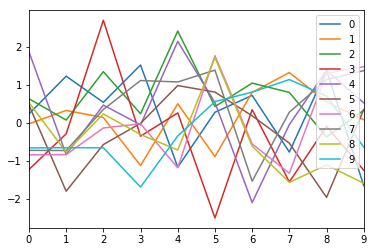

In [57]:
# グラフの描画
df.plot()

Matplotlib の使い方は、次章で説明します。